<a href="https://colab.research.google.com/github/EllenBurke29/Classification-Model-/blob/main/Copy_of_Halloween_candy_data_regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("data.csv")
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73200,0.86000,66.97173
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60400,0.51100,67.60294
2,One dime,0,0,0,0,0,0,0,0,0,0.01100,0.11600,32.26109
3,One quarter,0,0,0,0,0,0,0,0,0,0.01100,0.51100,46.11650
4,Air Heads,0,1,0,0,0,0,0,0,0,0.90600,0.51100,52.34146


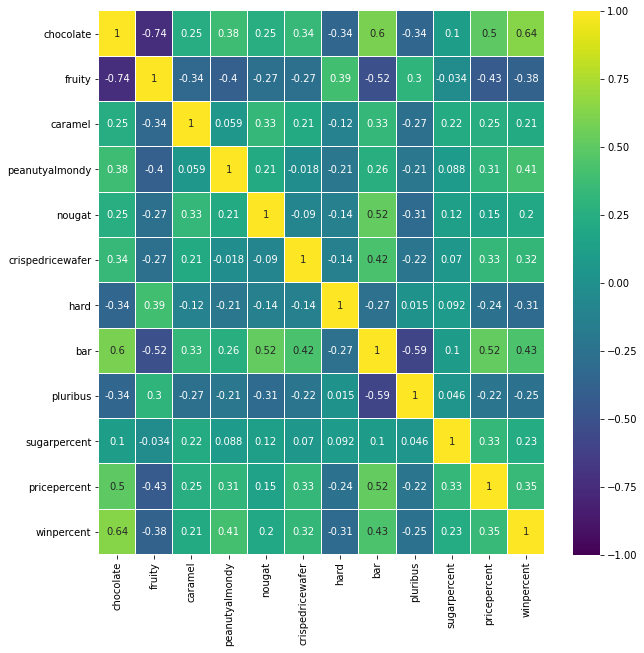

In [ ]:
df_kor = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

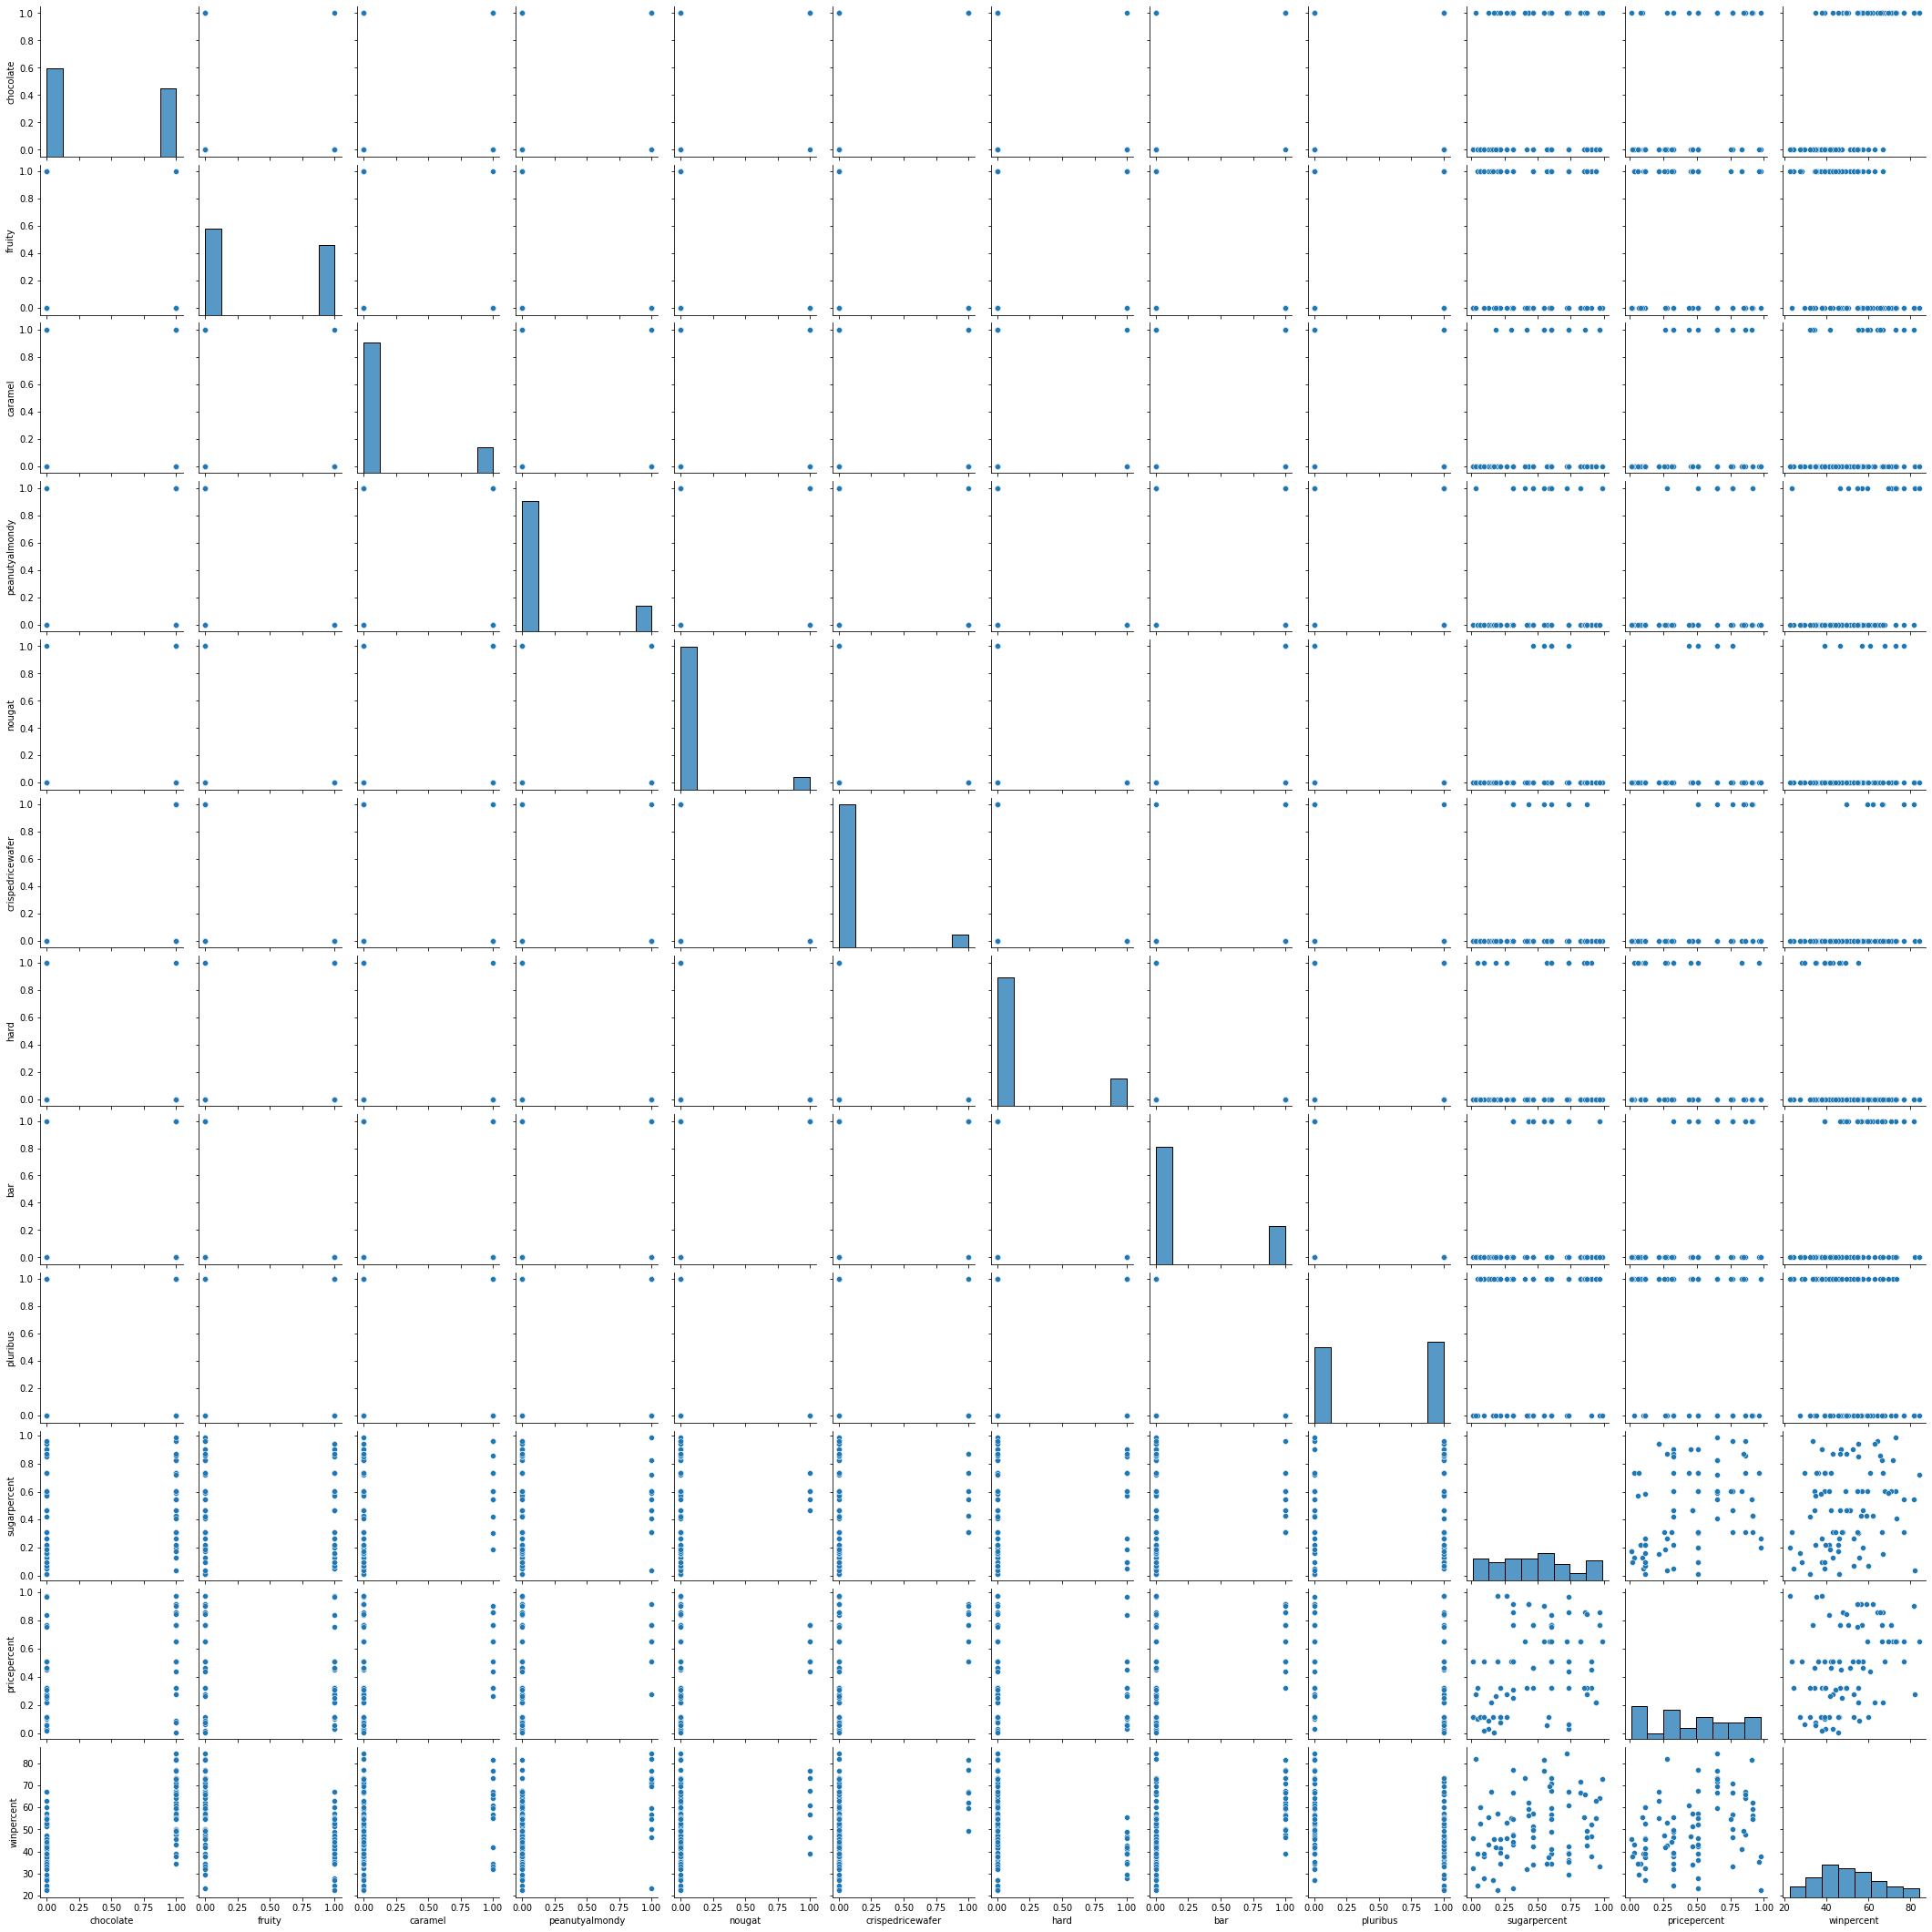

In [ ]:
sns.pairplot(df)

In [ ]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

In [ ]:
Y=df["pricepercent"]

X=df[[ "chocolate", "caramel", "nougat"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 68
Testing Data Count: 17


In [ ]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricepercent   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     7.013
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           0.000376
Time:                        14:55:30   Log-Likelihood:               0.054808
No. Observations:                  68   AIC:                             7.890
Df Residuals:                      64   BIC:                             16.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3579      0.041      8.724      0.000       0.276       0.440
chocolate      0.2506      0.064      3.944      0.000       0.124       0.377
caramel        0.1221      0.091      1.345      0.183      -0.059       0.304
nougat        -0.0198      0.114     -0.173      0.863      -0.248       0.208
==============================================================================
Omnibus:                        1.469   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.236
Skew:                           0.329   Prob(JB):                        0.539
Kurtosis:                       2.941   Cond. No.                         4.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X2=df[["chocolate", "caramel", "nougat"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.2, random_state = 465)

In [ ]:
print('Training Data Count:', X2_train.shape[0])
print('Testing Data Count::', X2_test.shape[0])

Training Data Count: 68
Testing Data Count:: 17


In [ ]:
X2_train = sm.add_constant(X2_train)

results2 = sm.OLS(y2_train, X2_train).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricepercent   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     7.013
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           0.000376
Time:                        14:44:16   Log-Likelihood:               0.054808
No. Observations:                  68   AIC:                             7.890
Df Residuals:                      64   BIC:                             16.77
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3579      0.041      8.724      0.000       0.276       0.440
chocolate      0.2506      0.064      3.944      0.000       0.124       0.377
caramel        0.1221      0.091      1.345      0.183      -0.059       0.304
nougat        -0.0198      0.114     -0.173      0.863      -0.248       0.208
==============================================================================
Omnibus:                        1.469   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.480   Jarque-Bera (JB):                1.236
Skew:                           0.329   Prob(JB):                        0.539
Kurtosis:                       2.941   Cond. No.                         4.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

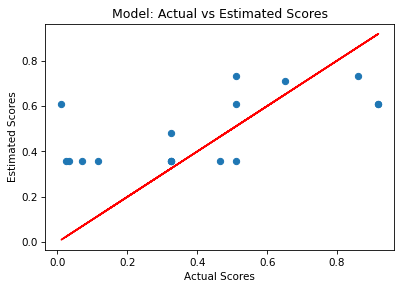

In [ ]:
X2_test = sm.add_constant(X2_test)

y2_preds = results2.predict(X2_test)

plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Actual Scores", )
plt.ylabel("Estimated Scores", )
plt.title("Model: Actual vs Estimated Scores", )
plt.show()

In [ ]:
print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y2_test, y2_preds)))
print("Mean Squared Error (MSE) : {}".format(mse(y2_test, y2_preds)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y2_test, y2_preds)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y2_test, y2_preds)))
print("Mean Absolute Perc. Error (MAPE) : {}".format(np.mean(np.abs((y2_test - y2_preds) / y2_test)) * 100))

Mean Absolute Error (MAE)         : 0.20155231430872086
Mean Squared Error (MSE) : 0.0616403993794138
Root Mean Squared Error (RMSE) : 0.24827484644928047
Root Mean Squared Error (RMSE) : 0.24827484644928047
Mean Absolute Perc. Error (MAPE) : 514.8402129924423


In [ ]:
X3=df[['chocolate', 'caramel']]
Y = df['pricepercent']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y, test_size = 0.2, random_state = 465)

X3_train = sm.add_constant(X3_train)

results3 = sm.OLS(y3_train, X3_train).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           pricepercent   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     10.66
Date:                Sat, 16 Jan 2021   Prob (F-statistic):           9.88e-05
Time:                        14:45:41   Log-Likelihood:               0.038890
No. Observations:                  68   AIC:                             5.922
Df Residuals:                      65   BIC:                             12.58
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3577      0.041      8.788      0.000       0.276       0.439
chocolate      0.2484      0.062      4.015      0.000       0.125       0.372
caramel        0.1179      0.087      1.359      0.179      -0.055       0.291
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.243
Skew:                           0.328   Prob(JB):                        0.537
Kurtosis:                       2.914   Cond. No.                         3.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

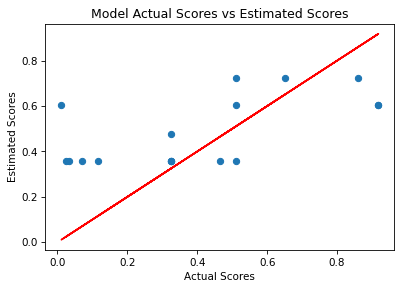

In [ ]:
X3_test = sm.add_constant(X3_test)
y3_preds = results3.predict(X3_test)

plt.figure(dpi = 75)
plt.scatter(y3_test, y3_preds)
plt.plot(y3_test, y3_test, color="red")
plt.xlabel("Actual Scores", )
plt.ylabel("Estimated Scores", )
plt.title("Model Actual Scores vs Estimated Scores", )
plt.show()

In [ ]:
print("Mean Absolute Error (MAE)         : {}".format(mean_absolute_error(y3_test, y3_preds)))
print("Mean Squared Error (MSE) : {}".format(mse(y3_test, y3_preds)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y3_test, y3_preds)))
print("Root Mean Squared Error (RMSE) : {}".format(rmse(y3_test, y3_preds)))
print("Mean Absolute Perc. Error (MAPE) : {}".format(np.mean(np.abs((y3_test - y3_preds) / y3_test)) * 100))

Mean Absolute Error (MAE)         : 0.20201336105321285
Mean Squared Error (MSE) : 0.06155753889735989
Root Mean Squared Error (RMSE) : 0.24810791784495692
Root Mean Squared Error (RMSE) : 0.24810791784495692
Mean Absolute Perc. Error (MAPE) : 513.5123841473144
